# Question 1

### 1)

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

X = genfromtxt("population_X.csv", delimiter=',')
Y = genfromtxt("population_Y.csv", delimiter=',')
Z = genfromtxt("population_Z.csv", delimiter=',')

def gaussian(x, mean, sd):
    return (1/(sd * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x-mean)/sd)**2)

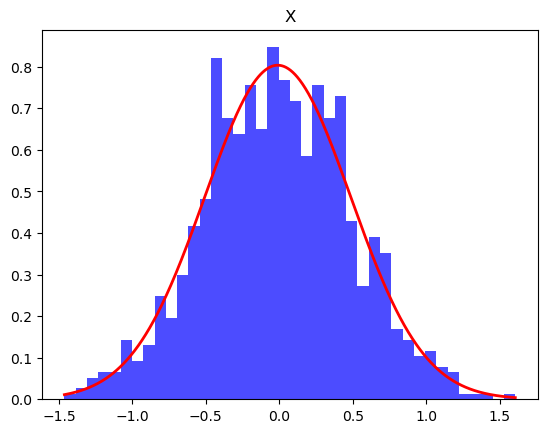

In [11]:
from scipy.stats import norm

x = np.linspace(min(X), max(X), 1000)
X_mean = np.mean(X)
X_sd = np.std(X)

# X is gaussian distribution
def p_x(x):
    dist = norm.pdf(x, X_mean, X_sd) # gaussian(x, X_mean, X_sd)
    return np.where(dist != 0, dist, 0.00001)

y = p_x(x)

plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.title("X")
plt.show()


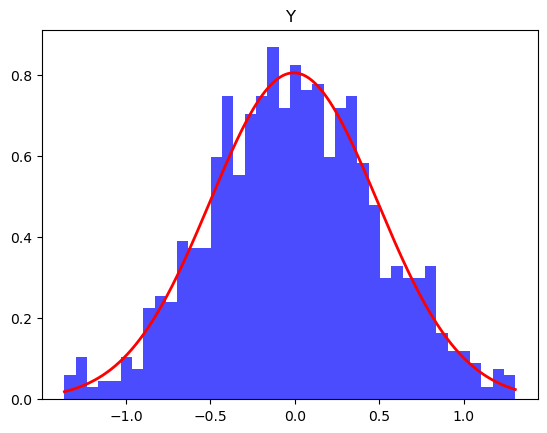

In [12]:
x = np.linspace(min(Y), max(Y), 1000)
Y_mean = np.mean(Y)
Y_sd = np.std(Y)

# Y is gaussian distribution
def p_y(x):
    dist = norm.pdf(x, Y_mean, Y_sd) # gaussian(x, Y_mean, Y_sd)
    return np.where(dist != 0, dist, 0.00001)

y = p_y(x)

plt.hist(Y, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.title("Y")
plt.show()

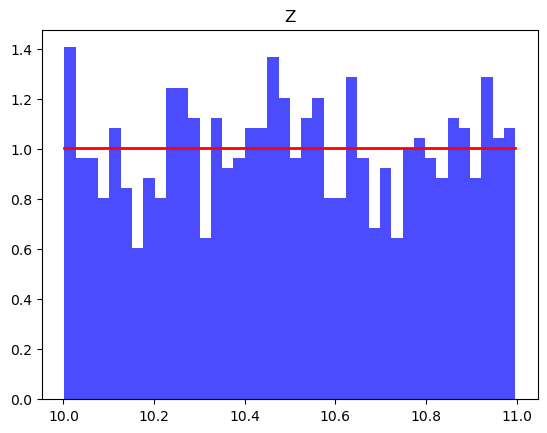

In [13]:
a = min(Z)
b = max(Z)
x = np.linspace(min(Z), max(Z), 1000)

def p_z(x):
    if isinstance(x, np.ndarray):
        return np.where((a<=x) & (x<=b), 1/(b - a), 0.0001)
    else:
        if a <= x <= b:
            return 1/(b-a)
        else:
            return 0.00001
    
y = p_z(x)

plt.hist(Z, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.title("Z")
plt.show()

### 2)
We should accept population Y's blood donations because the distribution is very similar to population X, the one that cures the disease.

### 3)

In [14]:
from scipy.integrate import quad 

def KL_divergence(x, p1, p2): 
    p_1 = p1(x)
    p_2 = p2(x)

    return p_1*np.log(p_1/p_2)

def KL_divergence_sample(x, p1, p2): 
    p_1 = p1(x)
    p_2 = p2(x)

    return np.log(p_1/p_2)

def KL_integral_XY(x):
    return KL_divergence(x, p_x, p_y)

def KL_integral_XZ(x):
    return KL_divergence(x, p_x, p_z)

def KL_sample_XY(x):
    return KL_divergence_sample(x, p_x, p_y)

def KL_sample_XZ(x):
    return KL_divergence_sample(x, p_x, p_z)


In [19]:
# samples = np.random.normal(np.mean(X), np.std(X), 1000000)

kl_xy, err = quad(KL_integral_XY, -100, 100) 
kl_sample_xy = np.mean(KL_sample_XY(X))

kl_xz, err = quad(KL_integral_XZ, -100, 100) 
kl_sample_xz = np.mean(KL_sample_XZ(X))


print(f'KL Divergence of px and py using integral: {kl_xy:.10f}')
print(f'KL Divergence of px and py using sampling: {kl_sample_xy:.10f}')

print(f'KL Divergence of px and pz using integral: {kl_xz:.10f}')
print(f'KL Divergence of px and pz using sampling: {kl_sample_xz:.10f}')

# Assume ε as the midpoint of the KL divergences
ε = kl_xz - kl_xy
print(f'Reasonable ε: {ε}')


KL Divergence of px and py using integral: 0.0000329247
KL Divergence of px and py using sampling: 0.0000329247
KL Divergence of px and pz using integral: 10.7944224927
KL Divergence of px and pz using sampling: 8.4918373997
Reasonable ε: 10.794389568021982


### 4)

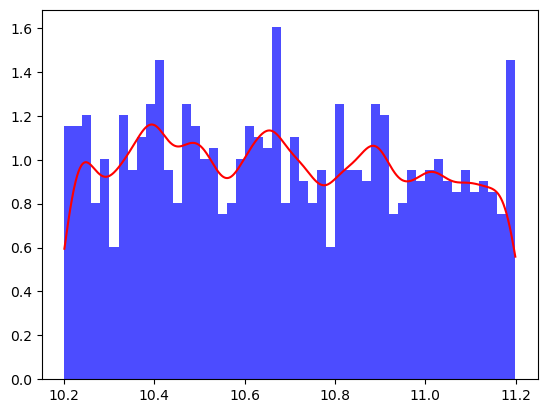

In [38]:
# Get KDE of Q
Q = genfromtxt("population_Q.csv", delimiter=',')

sd = 0.03
n = len(Q)

def p_q(x):
    pdf = 0
    for i in range(n):
        pdf = pdf + norm.pdf(x, Q[i], sd) # gaussian(x, Q[i], sd)
        
    pdf = pdf/n
    return pdf

x = np.linspace(np.min(Q), np.max(Q), 1000)
pdf = p_q(x)

plt.hist(Q, 50, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, pdf, color='red')
plt.show()


In [54]:
dist_list = [X, Y, Z, Q]
p_list = [p_x, p_y, p_z, p_q]


for dist, p in zip(dist_list, p_list):
    def entropy(x):
        px = p(x)
        
        return px * np.log(1/px)

    def entropy_sampling(x):
        return -np.log(p(x))
    
    H, err = quad(entropy, np.min(dist), np.max(dist)) 

    H_sample = np.mean(entropy_sampling(dist))
    
    print(f'Entropy of {p.__name__} using auto integration: {H}')
    print(f'Entropy of {p.__name__} using sampling: {H_sample}')

Entropy of p_x using auto integration: 0.7055854775161525
Entropy of p_x using sampling: 0.7185029722685773
Entropy of p_y using auto integration: 0.6823162599363102
Entropy of p_y using sampling: 0.7158629673318156
Entropy of p_z using auto integration: -0.005012541823545069
Entropy of p_z using sampling: -0.005012541823545077
Entropy of p_q using auto integration: 0.021327707555726987
Entropy of p_q using sampling: 0.029284336919136292


According to grace's theory, Q is closer to population Z. This makes sense, as when graphing population Q we can see that it is closer to a uniform distribution than a normal distribution. So Grace's theory makes sense and she should get a raise.

# Question 2

### 1)